In [2]:

#!pip install pyxlsb
#!pip install openpyxl
#!pip install pandas

In [32]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv
import hvplot.pandas
#from config import geoapify_key




In [34]:
df = pd.read_csv("Data_Analyst_Data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [35]:
# Check to see how many rows and columns we have
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 9355
Number of Columns: 12


In [36]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [37]:
# Check to see whether there are duplicates
duplicate_rows = df[df.duplicated()]
# Print the number of duplicates
num_duplicates = duplicate_rows.shape[0]
print("Number of duplicate rows:", num_duplicates)

null_values = df.isnull().sum()
# Check Data to make sure that the data set does not have any Null values
print("Null values count for each column:")
print(null_values)

Number of duplicate rows: 4014
Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [38]:
# Find the unique count of the specific job titles 
specific_jobs = df["job_title"].value_counts()
specific_jobs

job_title
Data Engineer                               2195
Data Scientist                              1989
Data Analyst                                1388
Machine Learning Engineer                    991
Applied Scientist                            272
Research Scientist                           269
Analytics Engineer                           256
Data Architect                               213
Business Intelligence Engineer               144
Research Engineer                            144
Data Manager                                 132
ML Engineer                                  106
Data Science Manager                          88
Machine Learning Scientist                    76
Business Intelligence Analyst                 54
BI Developer                                  52
Data Science Consultant                       44
Data Specialist                               40
Research Analyst                              39
Decision Scientist                            38
Data Analy

In [39]:
#Get the top 10 job titles
data_df= df['job_title'].value_counts().reset_index()
data_df.columns = ['job_title', 'count']
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


In [40]:
#Using the top 10 job titles, find the locations for those job titles. 
data_df = df.groupby(['company_location', 'job_title', 'work_year']).size().reset_index(name='count')
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,company_location,job_title,work_year,count
479,United States,Data Engineer,2023,1502
516,United States,Data Scientist,2023,1364
463,United States,Data Analyst,2023,969
559,United States,Machine Learning Engineer,2023,784
478,United States,Data Engineer,2022,410
515,United States,Data Scientist,2022,333
429,United States,Applied Scientist,2023,253
462,United States,Data Analyst,2022,234
591,United States,Research Scientist,2023,233
422,United States,Analytics Engineer,2023,176


In [41]:
#top_10_jobs = data_df.head(10)
#top_10_jobs

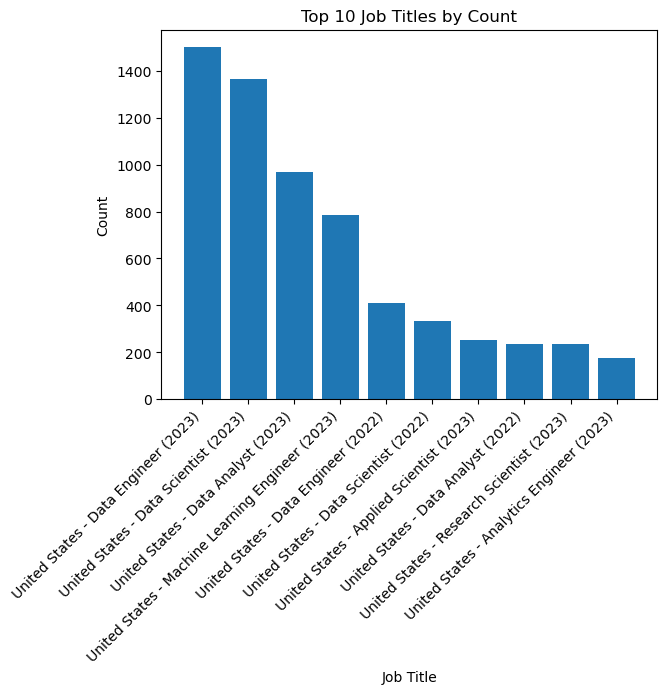

<Figure size 2000x1500 with 0 Axes>

In [42]:

#Plot a bar graph
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.bar(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'] + ' (' + top_10_jobs['work_year'].astype(str) + ')', top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()


In [43]:
#Find the mean Salary for the top 10 Job titles based on the different years, 2020,2021,2022 and 2023.

#List of years
years = [2020, 2021, 2022, 2023]
# Create an empty DataFrame to store the results
mean_salary_by_year = pd.DataFrame(columns=['year', 'job_title', 'mean_salary_in_usd'])
for year in years:
    # Filter Dataframe
    df_year = df[df['work_year'] == year]
    #mean= pd.DataFrame(columns=['year', 'job_title', 'mean_salary_in_usd'])
    #mean = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
    #mean= mean_salary_year.sort_values(by='salary_in_usd')
    #top_10_jobs_year = mean_salary_year.head(10)
    
    mean_salary_job_title = df_year.groupby("job_title")["salary_in_usd"].mean().reset_index()
    mean_salary_job_top_to_bottom = mean_salary_job_title.sort_values(by="salary_in_usd", ascending=False)
    # Add the year column
    top_10_jobs = mean_salary_job_top_to_bottom.head(10)
    #top_10_jobs["Year"] = years
    #mean_salary_by_year = mean_salary_by_year.append(top_10_jobs, ignore_index=True)
    
    print(mean_salary_job_top_to_bottom)

    
    #top_10_jobs_year['work_year'] = year
# Append the results to the mean_salary_by_year DataFrame
    #mean_salary_by_year = mean_salary_by_year.append(top_10_jobs_year, ignore_index=True)
    #print(mean_salary_by_year)


#top_10_jobs = data_df.head(10)

#years = [2020, 2021, 2022, 2023]
#mean_salary_by_year = pd.DataFrame(columns=['year', 'job_title', 'mean_salary'])
#for y in years:
#    df_year = df[df['work_year'] == y]
#    mean_salary_year = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
 #   mean = mean_salary_year.head(10)
  #  print(f"For the year {y}, the mean salary is {mean}")
    

#mean_salary_year = pd.Dataframe(colum)

                                   job_title  salary_in_usd
11                  Director of Data Science  325000.000000
20            Managing Director Data Science  300000.000000
19                Machine Learning Scientist  260000.000000
23                        Research Scientist  246000.000000
9                       Data Science Manager  190200.000000
26                      Staff Data Scientist  164000.000000
14                       Lead Data Scientist  152500.000000
21                  Principal Data Scientist  148261.000000
16                 Machine Learning Engineer  145904.500000
18                  Machine Learning Manager  117104.000000
4                      Business Data Analyst  110000.000000
8                    Data Science Consultant  103000.000000
1                        Azure Data Engineer  100000.000000
2                            BI Data Analyst   98000.000000
3                          Big Data Engineer   97690.333333
7                              Data Engi

In [44]:
# Assuming df is your DataFrame containing the data
# List of years
years = [2020, 2021, 2022, 2023]
# Create an empty DataFrame to store the results
mean_salary_by_year = pd.DataFrame(columns=['work_year', 'job_title', 'mean_salary_in_usd'])
for year in years:
    # Filter DataFrame
    df_year = df[df['work_year'] == year]
    # Calculate mean salary for each job title
    mean_salary_year = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
    # Sort mean salaries in descending order
    mean_salary_year = mean_salary_year.sort_values(by='salary_in_usd', ascending=False)
    # Select top 10 jobs
    top_10_jobs_year = mean_salary_year.head(10)
    # Add the year column
    top_10_jobs_year['work_year'] = year
    # Append the results to the mean_salary_by_year DataFrame
    mean_salary_by_year = pd.concat([mean_salary_by_year, top_10_jobs_year], ignore_index=True)
print(mean_salary_by_year)

   work_year                                 job_title mean_salary_in_usd  \
0       2020                  Director of Data Science                NaN   
1       2020            Managing Director Data Science                NaN   
2       2020                Machine Learning Scientist                NaN   
3       2020                        Research Scientist                NaN   
4       2020                      Data Science Manager                NaN   
5       2020                      Staff Data Scientist                NaN   
6       2020                       Lead Data Scientist                NaN   
7       2020                  Principal Data Scientist                NaN   
8       2020                 Machine Learning Engineer                NaN   
9       2020                  Machine Learning Manager                NaN   
10      2021                               ML Engineer                NaN   
11      2021                      Cloud Data Architect                NaN   

/var/folders/rp/8lsdkk916jq55y5zy1jgqcdw0000gn/T/ipykernel_82186/3788276535.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_jobs_year['work_year'] = year
/var/folders/rp/8lsdkk916jq55y5zy1jgqcdw0000gn/T/ipykernel_82186/3788276535.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_jobs_year['work_year'] = year
/var/folders/rp/8lsdkk916jq55y5zy1jgqcdw0000gn/T/ipykernel_82186/3788276535.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [45]:
final_df = pd.merge(mean_salary_job_top_to_bottom, mean_salary_by_year, on='job_title')
final_df 

,job_title,salary_in_usd_x,work_year,mean_salary_in_usd,salary_in_usd_y
0,Analytics Engineering Manager,399880.000000,2023,NaN,399880.000000
1,Head of Machine Learning,259000.000000,2023,NaN,259000.000000
2,AWS Data Architect,258000.000000,2023,NaN,258000.000000
3,AI Architect,250328.000000,2023,NaN,250328.000000
4,Director of Data Science,238153.523810,2020,NaN,325000.000000
5,Director of Data Science,238153.523810,2023,NaN,238153.523810
6,Head of Data,223261.423077,2021,NaN,189279.666667
7,Head of Data,223261.423077,2023,NaN,223261.423077
8,Deep Learning Engineer,215424.400000,2023,NaN,215424.400000
9,Head of Data Science,213281.000000,2022,NaN,195937.500000


In [46]:
for year in years:
    # Filter DataFrame
    df_year = df[df['work_year'] == year]
    # Calculate mean salary for each job title
    mean_salary_year = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
    # Add the year column
    mean_salary_year['year'] = year
    # Merge mean salary data back into the main DataFrame
    mean_salary_by_year = pd.concat([mean_salary_by_year, mean_salary_year], ignore_index=True)
    # Sort the DataFrame by year and mean salary
    mean_salary_by_year = mean_salary_by_year.sort_values(by=['year', 'mean_salary_in_usd'], ascending=False)
    df['salary_in_usd'] = df['salary_in_usd'].round(2)
    # Print the DataFrame
    #print(df)
    print(mean_salary_by_year)

   work_year                                 job_title mean_salary_in_usd  \
40       NaN                              AI Scientist                NaN   
41       NaN                       Azure Data Engineer                NaN   
42       NaN                           BI Data Analyst                NaN   
43       NaN                         Big Data Engineer                NaN   
44       NaN                     Business Data Analyst                NaN   
45       NaN                  Computer Vision Engineer                NaN   
46       NaN                              Data Analyst                NaN   
47       NaN                             Data Engineer                NaN   
48       NaN                   Data Science Consultant                NaN   
49       NaN                      Data Science Manager                NaN   
50       NaN                            Data Scientist                NaN   
51       NaN                  Director of Data Science                NaN   

In [47]:
df_reset = df.reset_index()
# Step 1: Filter the DataFrame for the years 2020, 2021, and 2022
filtered_df = df_reset[df_reset['work_year'].isin([2020, 2021, 2022, 2023])]
# Step 2: Group by job title and year, then calculate the mean salary
mean_salary_by_year_and_title = filtered_df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()
# Step 3: Calculate the overall mean salary for each job title across the years
overall_mean_salary_by_title = mean_salary_by_year_and_title.groupby('job_title')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
# Step 4: Determine the top 10 job titles based on overall mean salary
top_10_titles = overall_mean_salary_by_title.head(10)['job_title']
# Step 5: Filter the original grouped data to include only the top 10 job titles
top_10_data = mean_salary_by_year_and_title[mean_salary_by_year_and_title['job_title'].isin(top_10_titles)]
# Display the results
print(top_10_data)

                              job_title  work_year  salary_in_usd
0                          AI Architect       2023   250328.00000
12                   AWS Data Architect       2023   258000.00000
15        Analytics Engineering Manager       2023   399880.00000
55                 Cloud Data Architect       2021   250000.00000
76                  Data Analytics Lead       2022   405000.00000
77                  Data Analytics Lead       2023   113812.00000
128              Data Science Tech Lead       2022   375000.00000
146            Director of Data Science       2020   325000.00000
147            Director of Data Science       2021   168707.80000
148            Director of Data Science       2022   124911.50000
149            Director of Data Science       2023   238153.52381
163            Head of Machine Learning       2023   259000.00000
206  Machine Learning Software Engineer       2022   240440.00000
207  Machine Learning Software Engineer       2023   195700.00000
210      M

In [49]:
#Define the Unique experience Levels that we have.
unique_experience_levels = df['experience_level'].unique()
unique_experience_levels

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [52]:
#What is the distribution of experience levels among employees in terms of top 10 job titles and proportion percentages?
#top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

# Select the experience level for the first 10 jobs
first_10_jobs_exp_level = data_df["experience_level"].head(10)
# Print the experience level for these 10 jobs
print(first_10_jobs_exp_level)



KeyError: 'experience_level'